# Boston House Price Dataset
# Linear Regression

### In this exercise we will be using linear regression model from sklearn library and boston house pricing dataset.

#### Let's first look at the dataset description

In [1]:
with open("datasets/boston_housing_price/dataset_info.txt") as f:
    print(f.read())

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [2]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

We will use Pandas library to work with the dataset

In [3]:
# Reading the dataset from csv file using pandas
df = pd.read_csv("datasets/boston_housing_price/dataset.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### We can also look at the overall metadata for the dataframe by using info() method and the statistics for the dataframe by using describe() method as follows

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [15]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Here **price** is what we want to predict. Let's see its relations with couple of other columns. 

Here as mentioned in the description above **RM** stands for average number of rooms per dwelling.

If we look at the graph its showing that for more number of rooms the price is also more which makes sense completely.

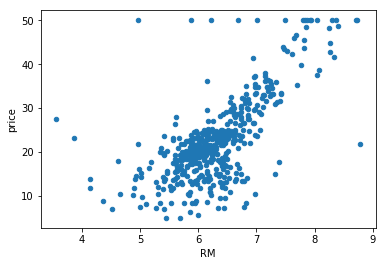

In [4]:
df.plot('RM', 'price', kind='scatter')
plt.show()

Here as mentioned in the description above **LSTAT** denotes % of lower status of population.

So if we think about it price of the house will be less if the population living around is of lesser status. This can be seen below in the graph. The more % of lower status population the lower the price.

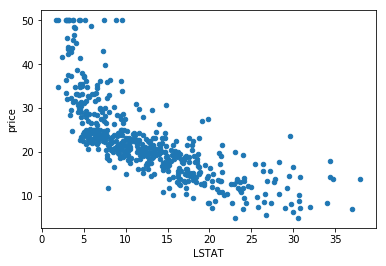

In [5]:
df.plot('LSTAT', 'price', kind='scatter')
plt.show()

We will be predicting **price** of the house. This makes the **price** column our __target/label__ and other columns our **features**.
 
We will separate features and label into **X** and __y__ variables respectivey as follows.

In [6]:
X = df.drop(['price'], axis=1) # dropping price column and saving other columns into X
y = df['price'] # saving price column into y

### Now that we have out features and labels we can train out model.
### But we dont have any data to test out model's accuracy on.
### Model's accuracy means for how many number of data is the model able to predict the correct value or in the case of linear regression, closer to the correct value
### For this purpose we will use a module from sklearn which will split the data into two sets: Training set and Testing set

In [7]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.1)

### Lets train our Linear Regression model on training data

In [8]:
model = LinearRegression()
model.fit(trainX, trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### We will use the model to predict for the testing set and store the predictions in a variable

In [9]:
predictions = model.predict(testX)
print(predictions)

[42.61545578 16.6615737  30.83388435 38.99478262 25.08250684 18.73065599
 32.64554656 17.46193303 27.85057016 25.02581956 18.14305623 20.44639381
 30.60379138 24.14413367 43.84211181 34.52703454 22.48394237 22.3357072
 19.7674008  22.92327946 28.66553288 33.83585417 14.48272973 25.77316392
 34.18987069 25.44176726 32.62995986 23.03431092 16.77959377 19.66932395
 32.04018058 16.12427204 17.66866979 15.75092742  6.44084703 25.26833811
 31.64190091 11.7555228  37.2581304  14.14189074 21.39884826 15.96763229
 37.64404033 23.07085007 17.16205613 13.86291741 40.85928096  8.08786036
 15.8892338  20.13215472 25.5132046 ]


### Let's see top 5 predicted as well as actual values

In [13]:
pd.DataFrame(list(zip(predictions, testy)), columns=["Prediction", "Actual"]).head()
'''As you can see in the result, the regression cannot always predict 
exact but approximate values to the actual values.'''

,Prediction,Actual
0,42.615456,50.0
1,16.661574,13.8
2,30.833884,28.4
3,38.994783,43.5
4,25.082507,21.6


### Let's use some functions from sklearn to see how good our model is.

Here we are using **mean squared error** to see how close the predictions are to the actual values.

This function does exactly as the name suggests. It calculates the difference between the actual and predicted values, then the difference is squared and atlast the mean/average of all the squared differences is calculated.

In [11]:
mean_squared_error(testy, predictions)

12.35903724605396

Another function is **r2_score** which generally gives a value between 0.0 to 1.0. The Best possible score is 1.0

In [12]:
r2_score(testy, predictions)

0.8892219578013705